![medical_cost_title_image](https://cdn.pixabay.com/photo/2022/03/13/01/33/insurance-7065113_960_720.png)

# **Can the cost of medical insurance be predicted?**

## 1. Introduction

This dataset contains medical insurance charges from a small sample of the US population, alongside personal parameters such as their: age, sex, BMI, number of children, smoking status and geographical area of residence. The dataset is publicly availble from Kaggle and was downloaded from the following link: https://github.com/stedy/Machine-Learning-with-R-datasets/blob/master/insurance.csv.

In this short project, this dataset will be explored to determine the best parameters to model a prediction for the cost of medical insurance. 

<u> <i> **Preliminary setup:**

*1. Import the required libraries and themes*

In [60]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

sns.set_theme(style="ticks")

*2. Read the dataset*

To follow this code, import the dataset by downloading the **insurance.csv** file, reading it into this notebook and storing it under the variable name, **data**.

For example, for me this will read as below, but you will need to change the filepath to where the dataset has been saved:

In [61]:
data=pd.read_csv(r"C:\Users\ru22327\OneDrive - University of Bristol\Documents\Y1\Data Science\insurance.csv")

*3. Check the data has imported*

This can be done by visualising a small portion of the dataframe:

In [62]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


*4. Check if there are any missing values that need to be accounted for:*

In [63]:
data.isna().any()

age         False
sex         False
bmi         False
children    False
smoker      False
region      False
charges     False
dtype: bool

"False" indicates that none of the columns contain missing data (NAs).

## 2. Exploring the dataset

Plotting a range of histograms and bar charts to visualise the distribution of data will determine whether there are any variables that may indicate the dataset is not representative of the general population.

**2.1 Sex differences - Is there an equal amount of females and males? Are there any differences in their smoking status, age, BMI or charges?**

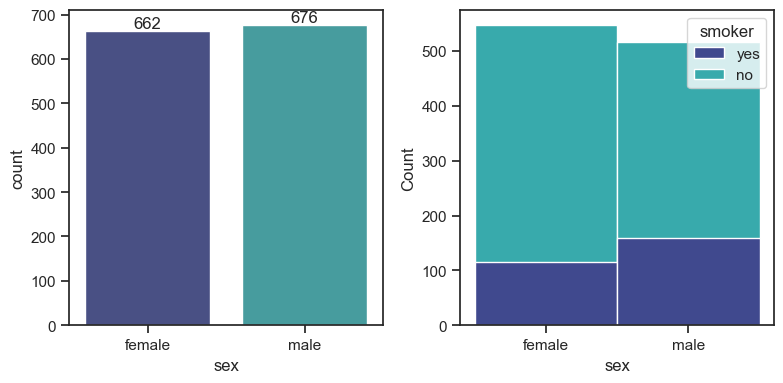

In [64]:
f, axs = plt.subplots(1, 2, figsize=(8,4), gridspec_kw=dict(width_ratios=[4, 4])) # this will plot 2 graphs next to each other and fix their ratios

sex_count = sns.countplot(x=data["sex"], order=data["sex"].value_counts(ascending=True).index, palette="mako", ax=axs[0]) # first bar graph for number of males and females 
abs_values = data["sex"].value_counts(ascending=True).values # finding the number of males and females
sex_count.bar_label(container=sex_count.containers[0], labels=abs_values) # adding the count to the chart 

sns.histplot(data=data, x="sex", hue="smoker", legend=True, palette="mako", alpha=1, ax=axs[1]) # second bar graph comparing the smoking status between the two sexes

f.tight_layout() # this line of code will prevent overlap between the two graphs when plotted

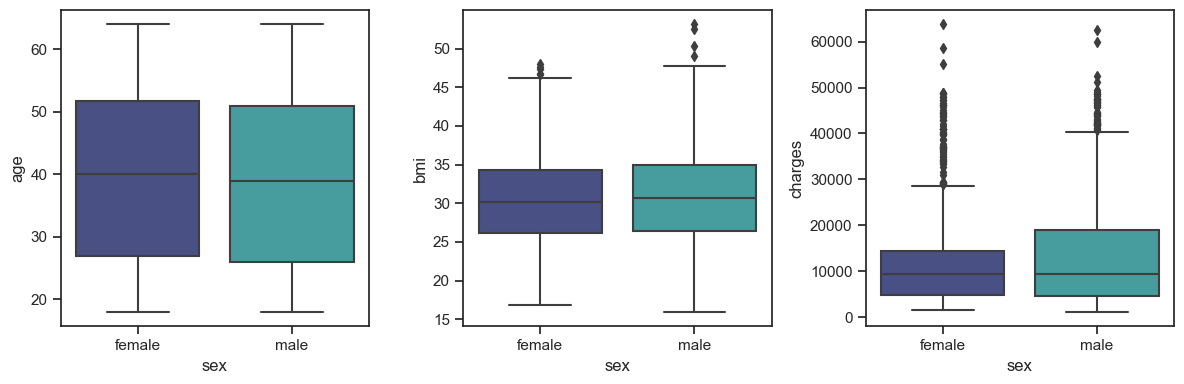

In [65]:
f, axs = plt.subplots(1, 3, figsize=(12,4))

age = sns.boxplot(data=data, x="sex", y="age", palette="mako", ax=axs[0]) # boxplot of the age distribution between the two sexes
BMI = sns.boxplot(data=data, x="sex", y="bmi", palette="mako", ax=axs[1]) # boxplot of the BMI distribution between the two sexes 
charge = sns.boxplot(data=data, x="sex", y="charges", palette="mako", ax=axs[2]) # boxplot of the charge distribution between the two sexes 

f.tight_layout()

The graphs show that there is an equal distribution of males and females in the dataset, and they are quite evenly matched in regards to smoking status, age, BMI and insurance charges. 

**2.2 Regional differences - Does the insurance cost vary with location of residence?**

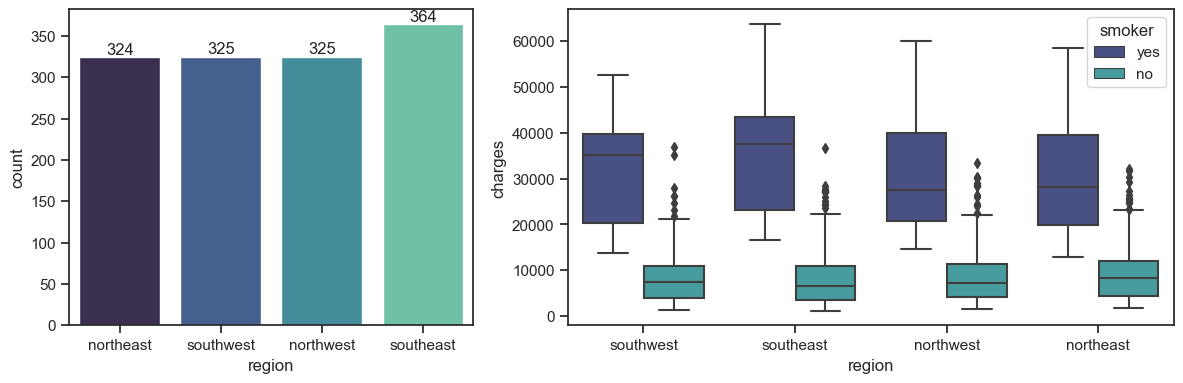

In [66]:
f, axs = plt.subplots(1, 2, figsize=(12, 4), gridspec_kw=dict(width_ratios=[8, 12]))

region = sns.countplot(x=data["region"], order=data["region"].value_counts(ascending=True).index, palette="mako", ax=axs[0])
abs_values = data["region"].value_counts(ascending=True).values
region.bar_label(container=region.containers[0], labels=abs_values)

sns.boxplot(data=data, x="region", y="charges", hue="smoker", palette="mako", ax=axs[1])

f.tight_layout()

Charges are consistent across the different regions, but smokers seem to consistently pay more than non-smokers.

## 3. Correlation analyses

As there are so many variables, a heatmap can help determine which ones are most highly correlated for further investigation:

<AxesSubplot:>

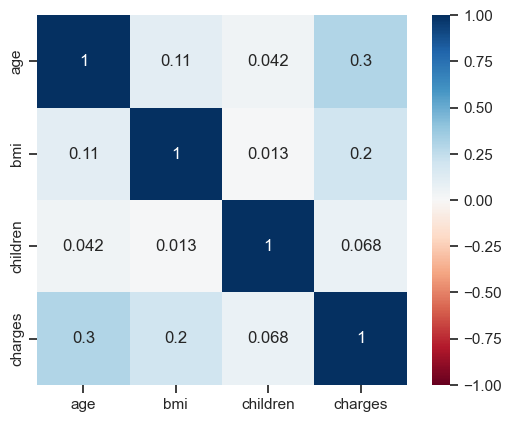

In [67]:
data.corr() # calling the correlation method
corr=data.corr()
sns.heatmap(corr, vmin=-1.0, vmax=1.0, square=True, cmap="RdBu", annot=True)

It would also be interesting to know how smoking status impacts this:

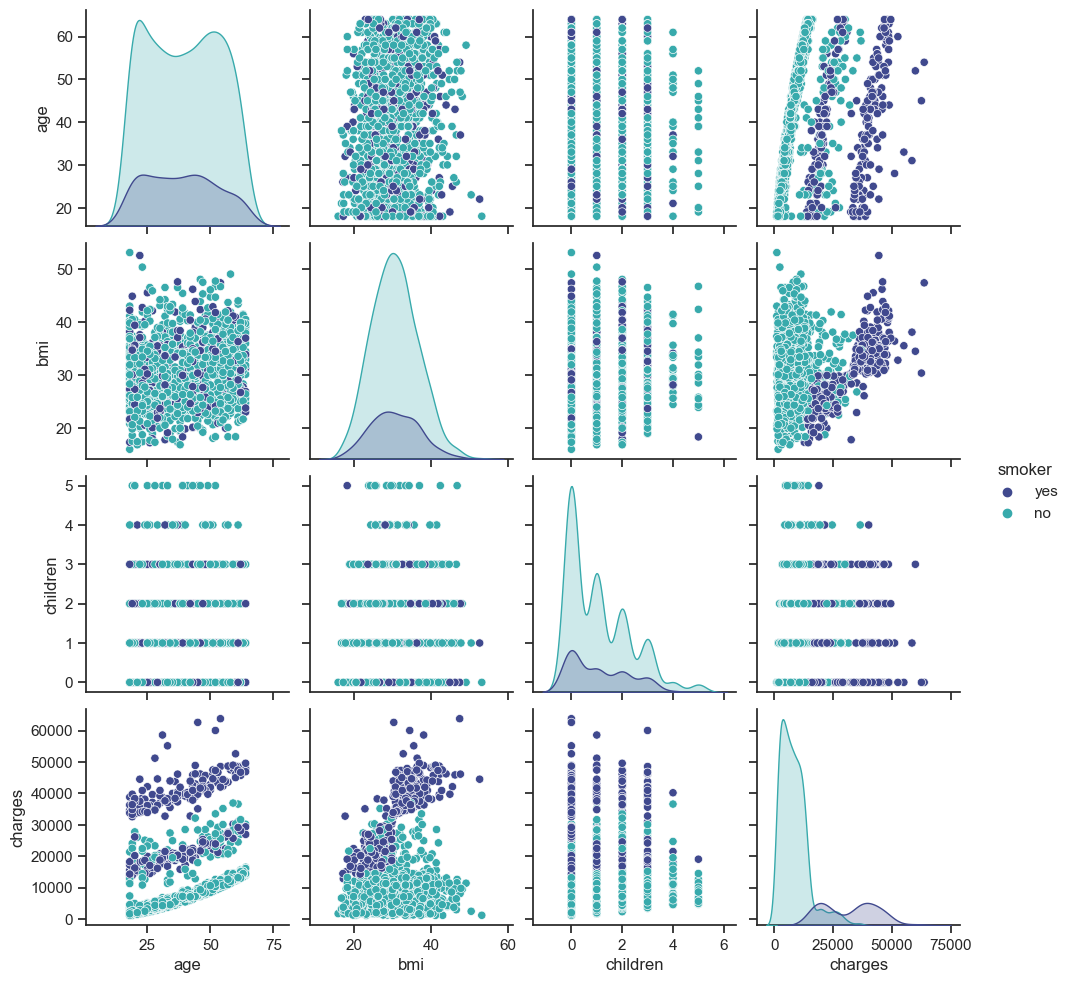

In [68]:
sns.pairplot(data, hue="smoker", palette="mako") # plotting pairwise relationships of the continuous variables, with data points coloured based on smoking status 

Age and BMI were the most highly correlated to charges as seen in the heatmap, and there is clearly an influence of smoking status. Let's take a closer look at the plots:

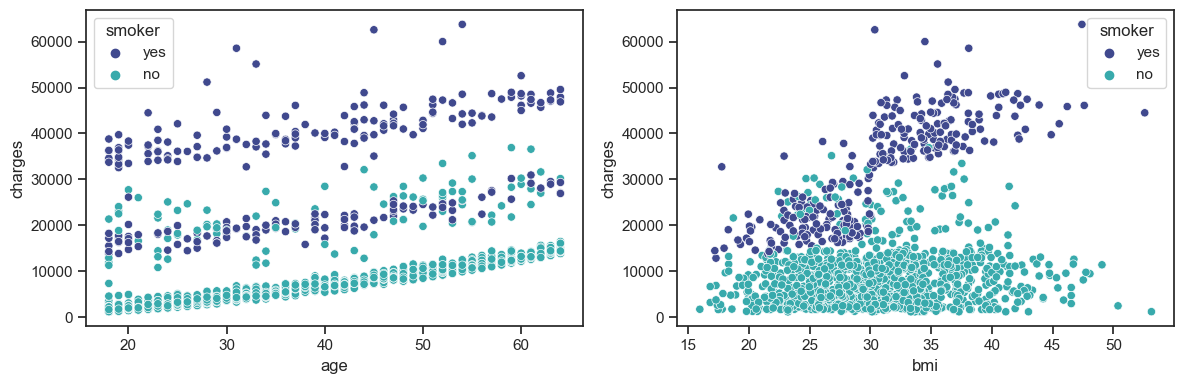

In [69]:
f, axs = plt.subplots(1, 2, figsize=(12,4), gridspec_kw=dict(width_ratios=[4, 4]))

charges_age = sns.scatterplot(x="age", y="charges", hue="smoker", palette = "mako", data=data, ax=axs[0])
charges_bmi = sns.scatterplot(x="bmi", y="charges", hue="smoker", palette = "mako", data=data, ax=axs[1])

f.tight_layout()

(Left) As can be seen in the age graph, there seems to be 3 main classes of charges with the overall trend indicating that the charge increases with age and smokers pay more than non-smokers; however, even with smoking status accounted for, this is still not enough to distinguish the charge bands as there is significant overlap in the middle class. It would be interesting to know whether the BMI classification may provide further insight into the charge status here.

(Right) The insurance charge does not vary much with BMI in non-smokers, however a very strong correlation can be seen in smokers - these variables may therefore be the best to use to predict the cost of medical insurance. 

Grouping the BMI values into the universally defined categories [1]:

In [72]:
data["weight_classification"] = np.nan # adding a new column into the dataframe 
bmi_class=[data]

for col in bmi_class:
    col.loc[col["bmi"] < 18.5, "weight_classification"] = "Underweight" # assigning labels to the BMI values
    col.loc[(col["bmi"] >= 18.5) & (col["bmi"] < 24.986), "weight_classification"] = "Healthy"
    col.loc[(col["bmi"] >= 25) & (col["bmi"] < 29.926), "weight_classification"] = "Overweight"
    col.loc[col["bmi"] >= 30, "weight_classification"] = "Obese"
    
data.head() # checking the new column has been added and filled with the correct values

,age,sex,bmi,children,smoker,region,charges,weight_classification
0,19,female,27.900,0,yes,southwest,16884.92400,Overweight
1,18,male,33.770,1,no,southeast,1725.55230,Obese
2,28,male,33.000,3,no,southeast,4449.46200,Obese
3,33,male,22.705,0,no,northwest,21984.47061,Healthy
4,32,male,28.880,0,no,northwest,3866.85520,Overweight


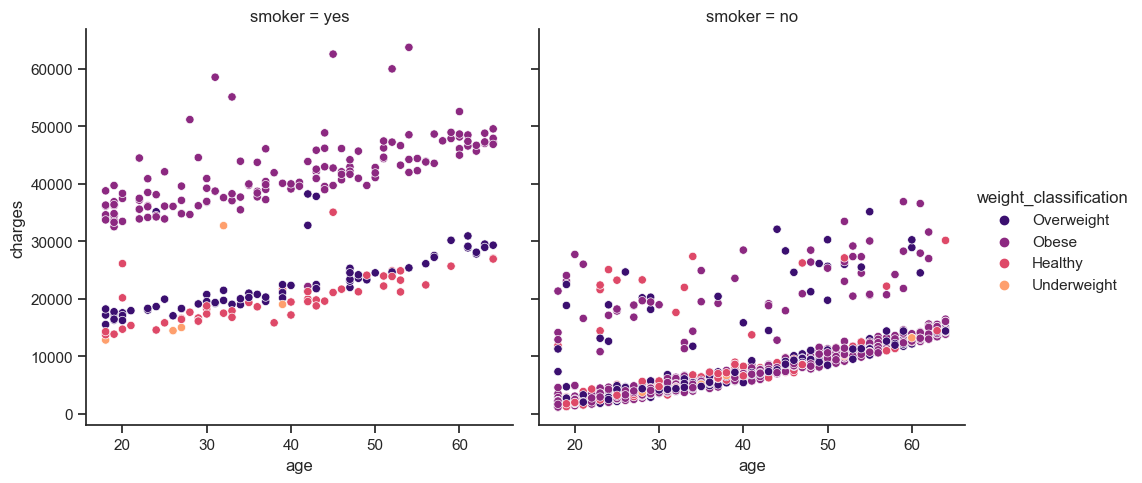

In [74]:
age_charge_smoker = sns.relplot(x="age", y="charges", hue="weight_classification", col="smoker", palette = "magma", data=data) # using "col" will separate the graphs by the variable entered

Both smokers and non-smokers span all 4 BMI classifications. In smokers, those that are obese tend to pay the highest charge band, but there remains a lot of overlap in different BMI classifications for the middle charge band in smokers, and no obvious correlation in non-smokers. 

By creating classifications for the charge bands, the relationship between age and BMI together on the cost of insurance can be investigated:

In [75]:
data["charge_band"] = pd.cut(data["charges"], # adding a new column into the dataframe called "charge_band" with data taken from the "charges" column 
                      bins=[0, 10001, 30001, float('Inf')], # charge classes will range from $1-$10,000, $10,001-$30,000, and $30,001 to the max value - binning will allow easy conversion from numerical to categorical values
                      labels=["1", "2", "3"]) # charge classes will be labelled, "1", "2" and "3" respectively
print(data)

      age     sex     bmi  children smoker     region      charges  \
0      19  female  27.900         0    yes  southwest  16884.92400   
1      18    male  33.770         1     no  southeast   1725.55230   
2      28    male  33.000         3     no  southeast   4449.46200   
3      33    male  22.705         0     no  northwest  21984.47061   
4      32    male  28.880         0     no  northwest   3866.85520   
...   ...     ...     ...       ...    ...        ...          ...   
1333   50    male  30.970         3     no  northwest  10600.54830   
1334   18  female  31.920         0     no  northeast   2205.98080   
1335   18  female  36.850         0     no  southeast   1629.83350   
1336   21  female  25.800         0     no  southwest   2007.94500   
1337   61  female  29.070         0    yes  northwest  29141.36030   

     weight_classification charge_band  
0               Overweight           2  
1                    Obese           1  
2                    Obese          

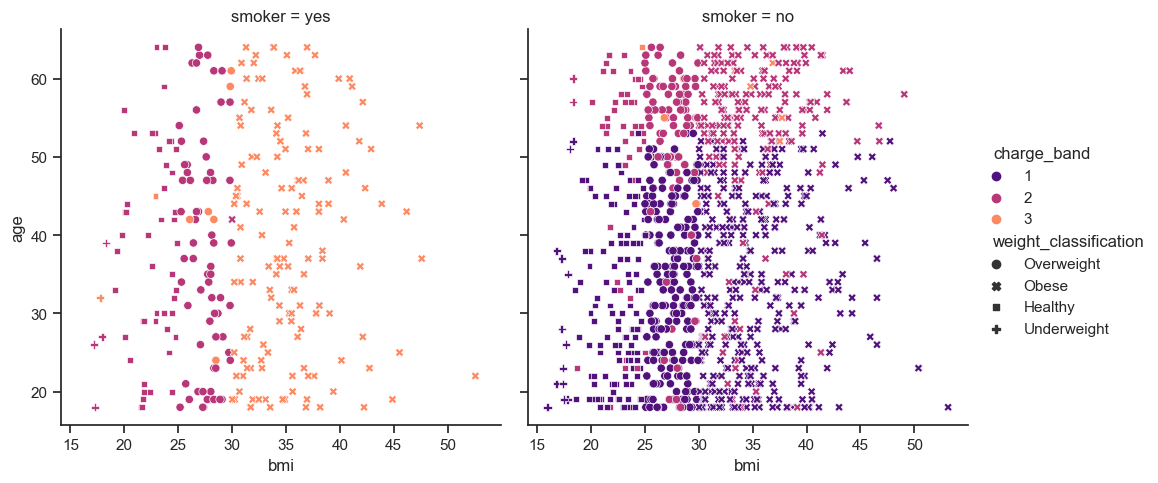

In [76]:
age_bmi_smoker = sns.relplot(x="bmi", y="age", hue="charge_band", style="weight_classification", col="smoker", palette = "magma", data=data)

From the plots, it is evident that a higher insurance cost corresponds to age for non-smokers (hue gets lighter/ charge band increases against y-axis), whereas BMI is the main factor for smokers (hue gets lighter/ charge band increases against x-axis).

Overall, this data investigation has revealed that the most clear trend for cost prediction is regarding BMI in smokers. Therefore, the most suitable model to predict the cost of medical insurance will be for smokers based on their BMI. 

## 4. Using regression to predict insurance costs

To plot data regarding smokers only, it will be easier to create a specific dataframe that can be used:

In [77]:
data[data["smoker"]=="yes"] # displaying all the data pertaining to smokers only

,age,sex,bmi,children,smoker,region,charges,weight_classification,charge_band
0,19,female,27.900,0,yes,southwest,16884.92400,Overweight,2
11,62,female,26.290,0,yes,southeast,27808.72510,Overweight,2
14,27,male,42.130,0,yes,southeast,39611.75770,Obese,3
19,30,male,35.300,0,yes,southwest,36837.46700,Obese,3
23,34,female,31.920,1,yes,northeast,37701.87680,Obese,3
...,...,...,...,...,...,...,...,...,...
1313,19,female,34.700,2,yes,southwest,36397.57600,Obese,3
1314,30,female,23.655,3,yes,northwest,18765.87545,Healthy,2
1321,62,male,26.695,0,yes,northeast,28101.33305,Overweight,2
1323,42,female,40.370,2,yes,southeast,43896.37630,Obese,3


In [78]:
data["smoker"].value_counts() # checking that the number of rows (274) is as expected

no     1064
yes     274
Name: smoker, dtype: int64

In [79]:
smoker=data[data["smoker"]=="yes"] # assigning the smoker-specific dataframe to the variable name "smoker"

In [81]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split # this function will split data into 2 subsets: training and test 

X = smoker[["bmi"]] # setting the variables for the model 
y = smoker["charges"]

train_X, test_X, train_y, test_y = train_test_split(X, y, random_state=42) # splitting the dataset in an equal and reproducible way

model = LinearRegression(fit_intercept=True) # calling the Linear Regression model
model.fit(train_X[["bmi"]], train_y) # fitting the training data to this model

LinearRegression()

In [82]:
model.score(test_X[["bmi"]], test_y) # display the model score

0.5647508631314677

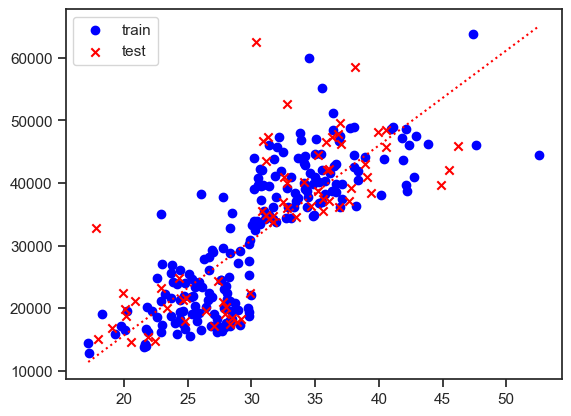

In [83]:
# plotting the data with the linear regression line:

x_fit = pd.DataFrame({"bmi": [X["bmi"].min(), X["bmi"].max()]})
y_pred = model.predict(x_fit)

fig, ax = plt.subplots()

ax.scatter(train_X, train_y, color="blue", marker="o", label="train")
ax.scatter(test_X, test_y, color="red", marker="x", label="test") # adding the test data to the plot to see how well the model can predict where these points lie 
ax.plot(x_fit["bmi"], y_pred, linestyle=":", color="red") # adding the line of best fit
ax.legend()

The model score is 0.56 - importing and testing the polynomials feature may create a model that better encompasses more of the data points:

In [84]:
from sklearn.preprocessing import PolynomialFeatures

X_ = PolynomialFeatures(degree=2, include_bias=False).fit_transform(X)
model = LinearRegression().fit(X_, y)
model.score(X_, y)

0.6628102818775137

0.66 is a much better score. The code was ran up to 20 degrees of the polynomial, and 10 gave the best result (0.74):

In [85]:
X_ = PolynomialFeatures(degree=10, include_bias=False).fit_transform(X) # change the degree number to what would like to be investigated
model = LinearRegression().fit(X_, y)
model.score(X_, y)

0.7435107899714777

Let's plot the graphs and see which is the better fit:

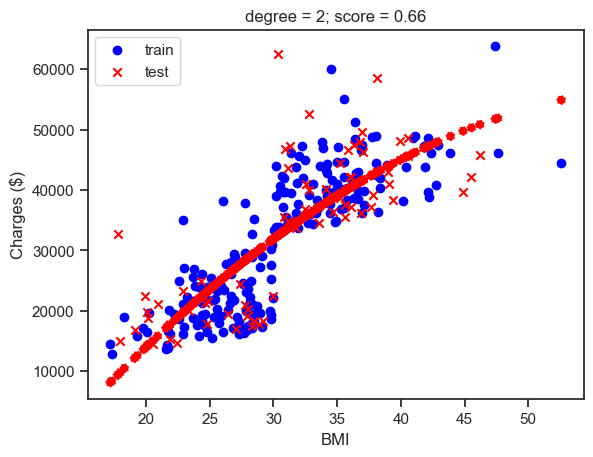

In [88]:
poly_reg = PolynomialFeatures(degree=2)
X_poly = poly_reg.fit_transform(X)
lin_reg = LinearRegression()
lin_reg.fit(X_poly,y) # fits the linear regression with coefficients

fig, ax = plt.subplots()
ax.scatter(train_X, train_y, color="blue", label="train")
ax.scatter(X, lin_reg.predict(poly_reg.fit_transform(X)), linestyle=":", color="red")
ax.scatter(test_X, test_y, color="red", marker="x", label="test")
plt.xlabel("BMI")
plt.ylabel("Charges ($)")
plt.title("degree = 2; score = 0.66")
ax.legend()

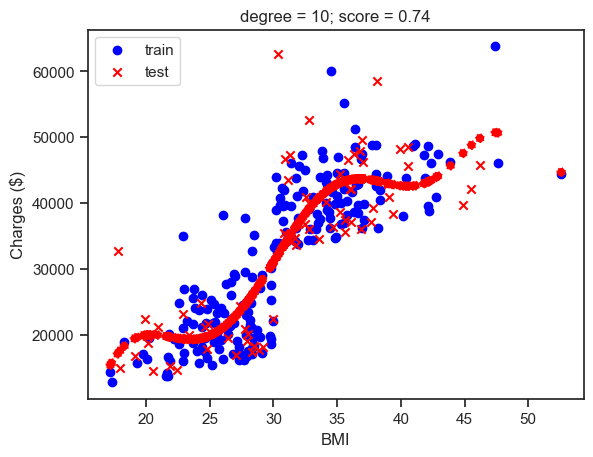

In [89]:
poly_reg = PolynomialFeatures(degree=10)
X_poly = poly_reg.fit_transform(X)
lin_reg2 = LinearRegression()
lin_reg2.fit(X_poly,y)

fig, ax = plt.subplots()
ax.scatter(train_X, train_y, color="blue", label="train")
ax.scatter(X, lin_reg2.predict(poly_reg.fit_transform(X)), linestyle=":", color="red")
ax.scatter(test_X, test_y, color="red", marker="x", label="test")
plt.xlabel("BMI")
plt.ylabel("Charges ($)")
plt.title("degree = 10; score = 0.74")
ax.legend()

Although the 10th degree of polynomial has the best model score, the line of best fit seems a bit overfitted compared to the 2nd degree. Therefore, for this dataset the best model to predict the cost of medical insurance is a linear regression specific to smokers based on their BMI, where the polynomial degree is set to 2. 

## 5. Summary /Conclusions

In this project, the medical cost dataset has been imported and read for the subsequent code to successfully display the distribution of the variables. After confirming that there were no significant differences between the smoking status, age, BMI or insurance costs between the sexes, as well as regional discrepancies in the charge paid, it was discovered that smokers as a whole paid more for medical insurance. 

Correlation analyses in the form of a heat map and multi-variable scatter matrix showed age and BMI - in combination with smoking status - to have the strongest influence on medical charge. Creating new categories for charge status and BMI weight classifications drew the conclusion that age is the driving factor for a higher medical insurance cost in non-smokers, whereas for smokers it is BMI. 

The strongest relationship found which could be used to model a prediction for the cost of medical insurance was regarding the BMI of smokers. Therefore, a new dataframe consisting of smokers only was derived from the original dataset, and a linear regression was fitted. The score of this original model was 0.56; this was improved to 0.66 and 0.74 using polynomial degrees of 2 and 10 respectively. Plotting these models showed that the 2nd degree polynomial had a visually better fit for the data. 

Overall, the best attempt to predict medical insurance is for smokers based on their BMI, but it is far from a perfect model despite optimisation efforts. Therefore, from this project I would conclude that the cost of medical insurance cannot be reliably predicted as the model produced only caters for a subset of the population and misses out on a lot of variation.

**References:**

[1] Defining adult overweight &amp; obesity (2022) Centers for Disease Control and Prevention. Centers for Disease Control and Prevention. Available at: https://www.cdc.gov/obesity/basics/adult-defining.html (Accessed: December 18, 2022). 